In [129]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from feature_engine.encoding import RareLabelEncoder

# Explorary Data Analysis

In [130]:
df  = pd.read_csv("cars.csv")
df.sample(5)

,_id,accelerate,annual_mtv,brand,color,drive_type,engine_capacity,fuel_type,gear_type,horse_power,kilometer,max_power,max_speed,min_power,model,price,safe,series,year
2963,60e1654b2ac38f69d0116b48,"12,8 sn",876 TL,Chevrolet,Beyaz,Önden Çekiş,1598 cc,LPG & Benzin,Otomatik,124 hp,106.000 km,6200 rpm,190 km/s,4000 rpm,1.6 Sport,118.900 TL,Sedan,Cruze,2013
6321,60e2c52490bad6750419d40b,NaN,-,Mercedes - Benz,Beyaz,Önden Çekiş,1401 - 1600 cm3,Dizel,Yarı Otomatik,101 - 125 HP,133.000 km,NaN,NaN,NaN,180 D AMG,296.000 TL,1401 - 1600 cm3,CLA,2014
10636,60e4e343ba0340c285a3d42a,"11,9 sn",617 TL,Volkswagen,Füme,Önden Çekiş,1390 cc,Benzin,Yarı Otomatik,85 hp,41.000 km,5000 rpm,177 km/s,3800 rpm,1.4 Comfortline,145.000 TL,Hatchback/5,Polo,2010
7086,60e349a4ba0340c285a3c64c,"10,2 sn",NaN,Opel,Siyah,Önden Çekiş,1364 cc,Benzin,Düz,140 hp,8.000 km,4900 rpm,207 km/s,1850 rpm,1.4 T Edition Plus,195.900 TL,Sedan,Astra,2020
11858,60e55da4ba0340c285a3d8f0,NaN,-****************,Mercedes - Benz,Beyaz,Arkadan İtiş,3001 - 3500 cm3,LPG & Benzin,Otomatik,501 - 525 HP,340.000 km,NaN,NaN,NaN,SEL,100.000 TL,3001 - 3500 cm3,300,1986


In [131]:
df.brand.value_counts()

Mercedes - Benz    2074
Citroen            1350
Renault            1136
Volkswagen          746
Audi                682
Chevrolet           599
BMW                 592
Honda               567
Ford                517
Dacia               427
Fiat                397
Opel                388
Peugeot             374
Skoda               361
Kia                 298
Nissan              252
Volvo               229
Toyota              197
Seat                181
Tofaş               148
MINI                112
Porsche              98
Alfa Romeo           83
Mazda                61
Suzuki               56
Mitsubishi           51
Lada                 39
Name: brand, dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12015 entries, 0 to 12014
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id              12015 non-null  object
 1   accelerate       6228 non-null   object
 2   annual_mtv       10590 non-null  object
 3   brand            12015 non-null  object
 4   color            10730 non-null  object
 5   drive_type       10737 non-null  object
 6   engine_capacity  12015 non-null  object
 7   fuel_type        12015 non-null  object
 8   gear_type        12015 non-null  object
 9   horse_power      12015 non-null  object
 10  kilometer        12015 non-null  object
 11  max_power        7358 non-null   object
 12  max_speed        6186 non-null   object
 13  min_power        7317 non-null   object
 14  model            12015 non-null  object
 15  price            12015 non-null  object
 16  safe             10734 non-null  object
 17  series           12015 non-null

In [133]:
df.drop(['_id'], axis=1,inplace=True)

# Drop Dublicate Data

In [134]:
df_uni = df.drop_duplicates(subset=["kilometer", "brand","color","model","series","safe","price"])


In [135]:
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7925 entries, 0 to 11964
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   accelerate       4499 non-null   object
 1   annual_mtv       7103 non-null   object
 2   brand            7925 non-null   object
 3   color            7232 non-null   object
 4   drive_type       7238 non-null   object
 5   engine_capacity  7925 non-null   object
 6   fuel_type        7925 non-null   object
 7   gear_type        7925 non-null   object
 8   horse_power      7925 non-null   object
 9   kilometer        7925 non-null   object
 10  max_power        5108 non-null   object
 11  max_speed        4461 non-null   object
 12  min_power        5076 non-null   object
 13  model            7925 non-null   object
 14  price            7925 non-null   object
 15  safe             7236 non-null   object
 16  series           7925 non-null   object
 17  year             7925 non-null  

# Missing Data

In [136]:
df_uni.isnull().sum()

accelerate         3426
annual_mtv          822
brand                 0
color               693
drive_type          687
engine_capacity       0
fuel_type             0
gear_type             0
horse_power           0
kilometer             0
max_power          2817
max_speed          3464
min_power          2849
model                 0
price                 0
safe                689
series                0
year                  0
dtype: int64

In [137]:
df.color.value_counts()

Beyaz                 3964
Siyah                 1639
Gri                   1311
İlk Sahibi Değilim     801
Kırmızı                507
Füme                   431
Mavi                   370
Mavi (metalik)         263
Takasa Uygun           260
Gri (Gümüş)            224
İlk Sahibiyim          204
Bordo                  132
Takasa Uygun Değil     128
Lacivert               123
Kahverengi              85
Bej                     68
Gri (metalik)           45
Yeşil                   44
Şampanya                32
Sarı                    20
Turuncu                 17
Turkuaz                 15
Gri (titanyum)          12
Altın                   11
Mor                     11
Yeşil (metalik)          9
Diğer                    3
Pembe                    1
Name: color, dtype: int64

In [138]:
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7925 entries, 0 to 11964
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   accelerate       4499 non-null   object
 1   annual_mtv       7103 non-null   object
 2   brand            7925 non-null   object
 3   color            7232 non-null   object
 4   drive_type       7238 non-null   object
 5   engine_capacity  7925 non-null   object
 6   fuel_type        7925 non-null   object
 7   gear_type        7925 non-null   object
 8   horse_power      7925 non-null   object
 9   kilometer        7925 non-null   object
 10  max_power        5108 non-null   object
 11  max_speed        4461 non-null   object
 12  min_power        5076 non-null   object
 13  model            7925 non-null   object
 14  price            7925 non-null   object
 15  safe             7236 non-null   object
 16  series           7925 non-null   object
 17  year             7925 non-null  

# Oulier Data

# Feature Price

In [139]:
df_uni.price[:3]

0    144.750 TL
1     65.000 TL
2    138.000 TL
Name: price, dtype: object

In [140]:
df_uni.price = [str(i).replace(".","").split()[0] for i in df_uni.price]
df_uni["price"] = df_uni["price"].astype(float)
df_uni.price[:3]

c:\users\guven bilişim\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-140-7543faf59253>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    144750.0
1     65000.0
2    138000.0
Name: price, dtype: float64

In [141]:
df_uni.price.isnull().sum()

0

In [142]:
def diagnostic_plots(df_uni, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_uni[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df_uni[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_uni[variable])
    plt.title('Boxplot')

    plt.show()

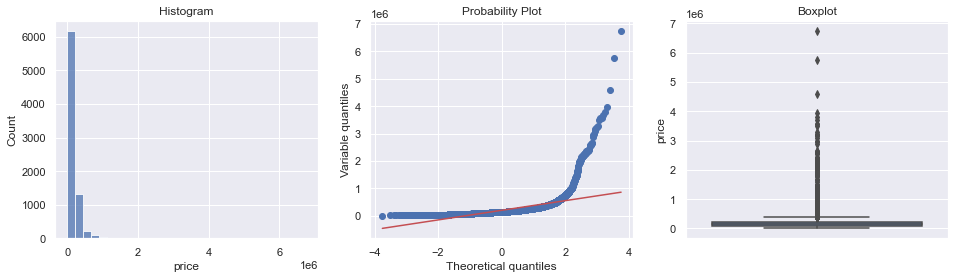

In [143]:
diagnostic_plots(df_uni, 'price')

In [144]:
fig = px.box(df_uni, y="price")
fig.show()

In [145]:
#df_uni.drop(df_uni.index[df_uni['price'] >3000000], inplace = True)


# annual_mtv      Feature

In [146]:
df.annual_mtv[:5]

0    876 TL
1    594 TL
2    876 TL
3    876 TL
4    876 TL
Name: annual_mtv, dtype: object

In [147]:
df.annual_mtv.value_counts()

-                    2352
1.510 TL             2127
876 TL               1784
236 TL                907
594 TL                679
                     ... 
80 LD 580               1
16                      1
3.812 TL                1
Xxxxxxxxx********       1
34H6004                 1
Name: annual_mtv, Length: 108, dtype: int64

In [148]:
df_uni.annual_mtv = [str(i).replace(".","").split()[0] for i in df_uni.annual_mtv]


c:\users\guven bilişim\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
df_uni.annual_mtv.value_counts()

-                    1646
876                  1349
1510                 1224
nan                   822
236                   718
                     ... 
1111111111              1
38AEH824                1
333333333********       1
45pa5485                1
34H6004                 1
Name: annual_mtv, Length: 106, dtype: int64

In [150]:
df_uni.annual_mtv = [None if re.findall("[a-zA-Z]",i) else i for i in df_uni.annual_mtv]

In [151]:
df_uni.annual_mtv.isnull().sum()

954

In [152]:
df_uni = df_uni.dropna()

In [153]:
df_uni.annual_mtv = df_uni.annual_mtv.astype(float)

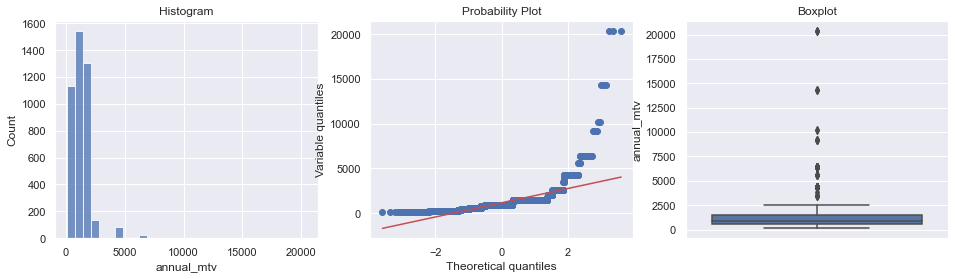

In [154]:
diagnostic_plots(df_uni, 'annual_mtv')

# Feature Year

In [155]:
df_uni.year.value_counts()

2017            590
2016            512
2015            440
2012            369
2011            339
2018            326
2013            288
2014            286
2010            168
2008            129
2009            118
2019            110
2006            106
2007             97
2005             74
2004             74
2000             28
1999             22
1997             22
2001             20
1993             20
1994             19
1998             17
2003             14
1992             13
1995              9
2002              9
1991              7
1990              6
1996              5
LPG & Benzin      4
1989              2
1988              1
Name: year, dtype: int64

In [156]:
df_uni.drop(df_uni.index[df_uni['year'] =="LPG & Benzin"], inplace = True)

df_uni.drop(df_uni.index[df_uni['year'] =="1988"], inplace = True)


In [157]:
#df_uni.drop(df_uni.index[df_uni['annual_mtv'] >3000], inplace = True)


In [158]:
df_uni.sample(5)

,accelerate,annual_mtv,brand,color,drive_type,engine_capacity,fuel_type,gear_type,horse_power,kilometer,max_power,max_speed,min_power,model,price,safe,series,year
3193,"14,2 sn",450.0,Citroen,Beyaz,Önden Çekiş,1199 cc,Benzin,Düz,73 hp,210.000 km,5750 rpm,160 km/s,2750 rpm,1.2 VTi Comfort,95000.0,Sedan,C-Elysee,2015
10000,"9,2 sn",876.0,Volvo,Kahverengi,Önden Çekiş,1595 cc,Benzin,Yarı Otomatik,180 hp,142.000 km,5700 rpm,220 km/s,5000 rpm,1.6 T4 Advance,245000.0,Sedan,S80,2011
3631,"11,1 sn",806.0,Dacia,Gri,Önden Çekiş,898 cc,Benzin,Yarı Otomatik,90 hp,32.500 km,5000 rpm,168 km/s,2250 rpm,0.9 TCe Stepway Easy-R,139500.0,Hatchback/5,Sandero,2016
8177,"12,2 sn",876.0,Renault,Beyaz,Önden Çekiş,1461 cc,Dizel,Düz,90 hp,93.000 km,3750 rpm,167 km/s,1750 rpm,1.5 dCi Touch,117500.0,Sedan,Symbol,2015
9090,"9,8 sn",806.0,Skoda,Beyaz,Önden Çekiş,999 cc,Benzin,Yarı Otomatik,110 hp,16.300 km,5500 rpm,196 km/s,2000 rpm,1.0 GreenTec Style,177900.0,Hatchback/5,Fabia,2017


In [159]:
df_anu = df_uni.groupby('year')["annual_mtv"].mean().reset_index()

In [160]:
fig = px.line(df_anu, x="year", y="annual_mtv", title='Annual Year in Turkey')
fig.show()

In [161]:
df_uni.sample(5)

,accelerate,annual_mtv,brand,color,drive_type,engine_capacity,fuel_type,gear_type,horse_power,kilometer,max_power,max_speed,min_power,model,price,safe,series,year
3756,"13,5 sn",120.0,Fiat,Beyaz,Önden Çekiş,1242 cc,LPG & Benzin,Düz,80 hp,225.000 km,5000 rpm,162 km/s,4000 rpm,1.2 EL,63500.0,Sedan,Albea,2004
10324,"10,8 sn",2014.0,Volkswagen,Mavi,Önden Çekiş,1598 cc,Dizel,Yarı Otomatik,120 hp,56.000 km,4000 rpm,206 km/s,1500 rpm,1.6 TDi BlueMotion Impression,343000.0,Sedan,Passat,2019
3070,"9,8 sn",594.0,Citroen,Gri,Önden Çekiş,1997 cc,Dizel,Düz,138 hp,220.000 km,4000 rpm,205 km/s,2000 rpm,2.0 HDi Exclusive,79500.0,Sedan,C5,2006
7898,"12,1 sn",876.0,Renault,Beyaz,Önden Çekiş,1461 cc,Dizel,Yarı Otomatik,110 hp,77.855 km,4000 rpm,190 km/s,1750 rpm,1.5 dCi Sport Tourer GT-Line,175900.0,Station wagon,Megane,2015
4673,"10,3 sn",617.0,Honda,Siyah,Önden Çekiş,1595 cc,LPG & Benzin,Otomatik,125 hp,157.000 km,6500 rpm,192 km/s,4200 rpm,1.6 i-VTEC Elegance,125950.0,Sedan,Civic,2007


# Accelerate Feature 

In [162]:
df_uni.accelerate = [str(i).replace(",",".").split()[0] for i in df_uni.accelerate]
df_uni.accelerate = df_uni.accelerate.astype(float)

In [163]:
df_uni.accelerate[:5]

0    11.3
1     8.6
2    11.3
3    11.3
4    11.3
Name: accelerate, dtype: float64

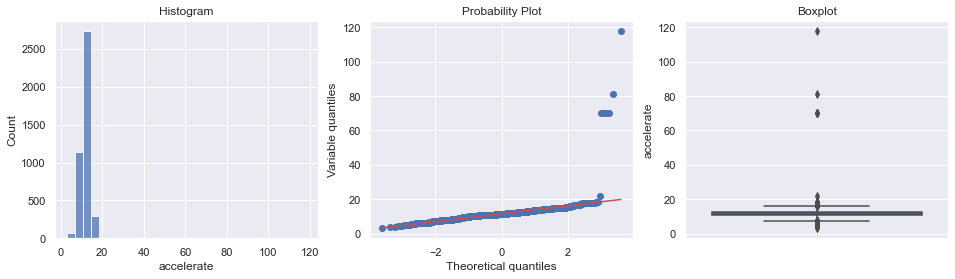

In [164]:
diagnostic_plots(df_uni, 'accelerate')

In [165]:
df_uni.drop(df_uni.index[df_uni['accelerate'] >20], inplace = True)


# engine_capacity Feature

In [166]:
df_uni.engine_capacity = [str(i).replace(",",".").split()[0] for i in df_uni.engine_capacity]
df_uni.engine_capacity = df_uni.engine_capacity.astype(float)

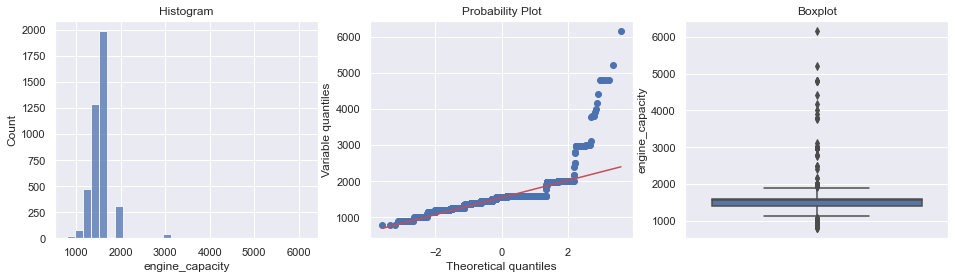

In [167]:
diagnostic_plots(df_uni, 'engine_capacity')

In [168]:
df_uni.drop(df_uni.index[df_uni['engine_capacity'] >3500], inplace = True)


In [169]:
df_uni.brand.value_counts()

Ford               383
Audi               353
Volkswagen         347
Renault            346
Citroen            264
Fiat               255
Skoda              250
Dacia              214
Chevrolet          212
BMW                200
Peugeot            197
Opel               172
Kia                166
Honda              150
Volvo              126
Seat               119
Toyota             100
Nissan              89
Alfa Romeo          63
Tofaş               62
MINI                33
Mazda               27
Suzuki              26
Lada                21
Porsche             15
Mercedes - Benz     14
Mitsubishi          13
Name: brand, dtype: int64

In [170]:
df_uni.sample(5)

,accelerate,annual_mtv,brand,color,drive_type,engine_capacity,fuel_type,gear_type,horse_power,kilometer,max_power,max_speed,min_power,model,price,safe,series,year
10025,8.6,1510.0,Volvo,Beyaz,Önden Çekiş,1498.0,Benzin,Otomatik,152 hp,38.000 km,5000 rpm,210 km/s,4000 rpm,1.5 T3 Advance,370000.0,Sedan,S60,2018
4082,11.7,806.0,Fiat,Beyaz,Önden Çekiş,1248.0,Dizel,Düz,95 hp,88.000 km,3750 rpm,183 km/s,1500 rpm,1.3 Multijet Easy,129950.0,Sedan,Egea,2017
1094,10.5,876.0,BMW,Beyaz,Arkadan İtiş,1598.0,Dizel,Düz,116 hp,114.000 km,4000 rpm,195 km/s,1750 rpm,116d ED EfficientDynamics,204900.0,Hatchback/5,1 Serisi,2014
505,10.7,876.0,Audi,Beyaz,Önden Çekiş,1598.0,Dizel,Yarı Otomatik,110 hp,154.000 km,3200 rpm,200 km/s,1500 rpm,A3 Sportback 1.6 TDI Ambiente,246250.0,Hatchback/5,A3,2014
9466,13.4,236.0,Tofaş,Kırmızı,Arkadan İtiş,1581.0,LPG & Benzin,Düz,83 hp,107.000 km,5800 rpm,168 km/s,3250 rpm,S,48750.0,Station wagon,Kartal,1997


# horse_power Feature

In [171]:
df_uni.horse_power = [str(i).replace(".","").split()[0] for i in df_uni.horse_power]
df_uni.horse_power = df_uni.horse_power.astype(int)

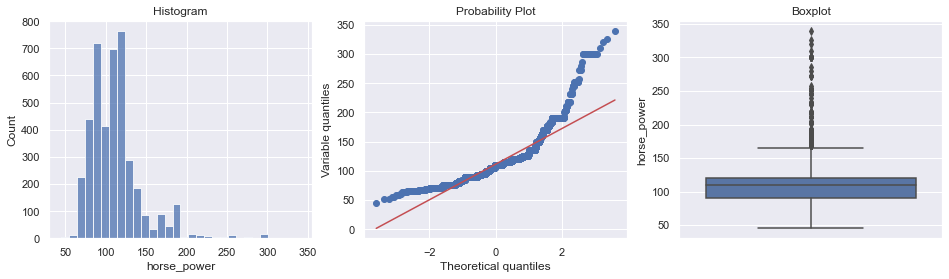

In [172]:
diagnostic_plots(df_uni, 'horse_power')

# Kilometer Feature

In [173]:
df_uni.kilometer = [str(i).replace(".","").split()[0] for i in df_uni.kilometer]
df_uni.kilometer = df_uni.kilometer.astype(float)

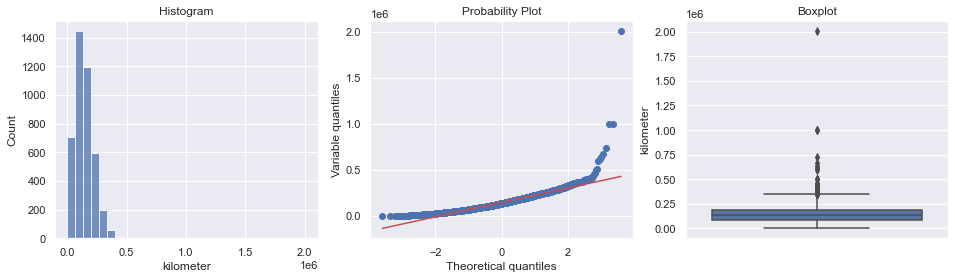

In [174]:
diagnostic_plots(df_uni, 'kilometer')

In [175]:
fig = px.box(df_uni, y="kilometer")
fig.show()

In [176]:
df_uni.drop(df_uni.index[df_uni['kilometer'] >500000], inplace = True)


In [177]:
df_uni.sample(5)

,accelerate,annual_mtv,brand,color,drive_type,engine_capacity,fuel_type,gear_type,horse_power,kilometer,max_power,max_speed,min_power,model,price,safe,series,year
4553,15.0,236.0,Ford,Beyaz,Önden Çekiş,1399.0,Dizel,Düz,68,205000.0,4000 rpm,164 km/s,2000 rpm,1.4 TDCi Comfort,75000.0,Hatchback/5,Fiesta,2005
46,10.5,236.0,Alfa Romeo,Siyah,Önden Çekiş,1598.0,LPG & Benzin,Düz,120,241000.0,6200 rpm,200 km/s,4200 rpm,1.6 TS Distinctive,81000.0,Sedan,156,2006
3151,11.2,876.0,Citroen,Gri,Önden Çekiş,1560.0,Dizel,Yarı Otomatik,114,216000.0,3600 rpm,190 km/s,1750 rpm,1.6 e-HDi Exclusive,133750.0,Hatchback/5,C4,2011
4363,12.6,876.0,Ford,Beyaz,Önden Çekiş,1560.0,Dizel,Düz,95,165000.0,3600 rpm,182 km/s,1500 rpm,1.6 TDCi Trend X,136000.0,Sedan,Focus,2015
4455,10.9,1510.0,Ford,Beyaz,Önden Çekiş,1499.0,Dizel,Yarı Otomatik,120,98000.0,3600 rpm,193 km/s,1750 rpm,1.5 TDCi Trend X,189000.0,Sedan,Focus,2017


# max_power Feature 

In [178]:
df_uni.max_power = [str(i).replace(".","").split()[0] for i in df_uni.max_power]
df_uni.max_power = df_uni.max_power.astype(float)

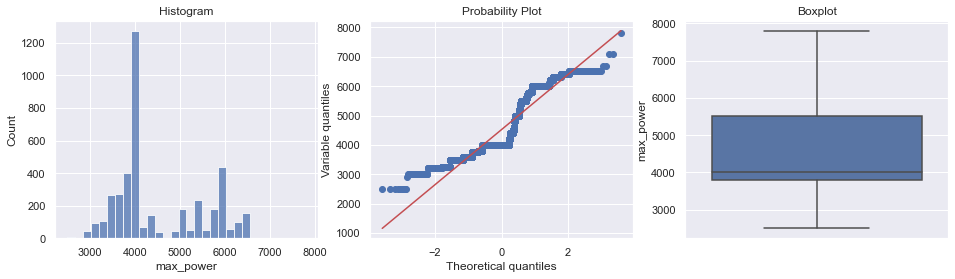

In [179]:
diagnostic_plots(df_uni, 'max_power')

# min_power Feature

In [180]:
df_uni.min_power = [str(i).replace(".","").split()[0] for i in df_uni.min_power]
df_uni.min_power = df_uni.min_power.astype(float)

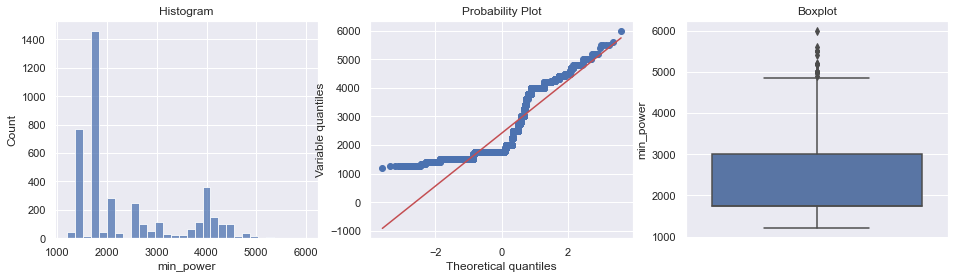

In [181]:
diagnostic_plots(df_uni, 'min_power')

In [182]:
df_uni.sample(5)

,accelerate,annual_mtv,brand,color,drive_type,engine_capacity,fuel_type,gear_type,horse_power,kilometer,max_power,max_speed,min_power,model,price,safe,series,year
9745,14.7,1510.0,Toyota,Beyaz,Önden Çekiş,1364.0,Dizel,Yarı Otomatik,90,127000.0,3800.0,180 km/s,1800.0,1.4 D-4D Touch,173500.0,Sedan,Corolla,2017
5474,11.8,236.0,Kia,Gri,Önden Çekiş,1324.0,Benzin,Düz,64,196000.0,5500.0,150 km/s,4000.0,1.3 GLXi,39900.0,Hatchback/5,Pride,2001
8009,12.5,1510.0,Renault,Beyaz,Önden Çekiş,1461.0,Dizel,Yarı Otomatik,110,142000.0,4000.0,190 km/s,1750.0,1.5 dCi Touch,189750.0,Sedan,Megane,2017
6833,17.9,341.0,Nissan,Siyah,Önden Çekiş,1240.0,Benzin,Otomatik,80,99000.0,5200.0,145 km/s,3600.0,1.2 Tekna,89000.0,Hatchback/5,Micra,2008
1376,12.7,876.0,Chevrolet,Siyah,Önden Çekiş,1598.0,LPG & Benzin,Otomatik,124,160000.0,6200.0,185 km/s,4200.0,1.6 LT Plus,119750.0,Hatchback/5,Cruze,2012


# max_speed Feature

In [183]:
df_uni.max_speed = [str(i).replace(".","").split()[0] for i in df_uni.max_speed]
df_uni.max_speed = df_uni.max_speed.astype(float)

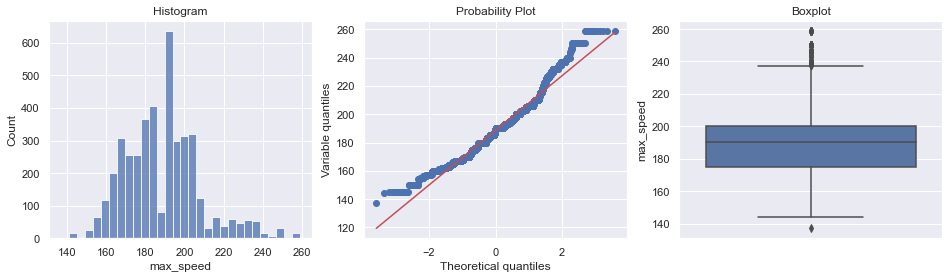

In [184]:
diagnostic_plots(df_uni, 'max_speed')

In [185]:
df_uni.max_speed.max()

259.0

In [186]:
df_uni.sample(5)

,accelerate,annual_mtv,brand,color,drive_type,engine_capacity,fuel_type,gear_type,horse_power,kilometer,max_power,max_speed,min_power,model,price,safe,series,year
1156,12.3,876.0,BMW,Gri (Gümüş),Arkadan İtiş,1596.0,Benzin,Otomatik,116,85000.0,6000.0,197.0,4300.0,116i Comfort,189750.0,Hatchback/5,1 Serisi,2011
3727,12.0,1510.0,Dacia,Gri,Önden Çekiş,1461.0,Dizel,Yarı Otomatik,90,95000.0,4000.0,166.0,1750.0,1.5 dCi Stepway,147750.0,Hatchback/5,Sandero,2016
709,10.4,2014.0,Audi,Beyaz,Önden Çekiş,1598.0,Dizel,Yarı Otomatik,116,35000.0,4000.0,205.0,1500.0,A3 Sedan 30 TDI Dynamic,362900.0,Sedan,A3,2019
9392,13.5,806.0,Suzuki,Beyaz,Önden Çekiş,1242.0,LPG & Benzin,Otomatik,95,71000.0,6000.0,160.0,4800.0,1.2 GL,148750.0,Hatchback/5,Swift,2016
8095,12.9,1510.0,Renault,Beyaz,Önden Çekiş,1461.0,Dizel,Yarı Otomatik,90,65000.0,4000.0,176.0,1750.0,1.5 dCi Touch,172900.0,Hatchback/5,Clio,2018


In [187]:
df_uni.drive_type.value_counts()

Önden Çekiş     3841
Arkadan İtiş     268
4x4               99
Name: drive_type, dtype: int64

In [188]:
df_uni[df_uni.drive_type =="Arkadan İtiş"] 

,accelerate,annual_mtv,brand,color,drive_type,engine_capacity,fuel_type,gear_type,horse_power,kilometer,max_power,max_speed,min_power,model,price,safe,series,year
765,10.3,1510.0,BMW,Mavi (metalik),Arkadan İtiş,1496.0,Dizel,Otomatik,116,77000.0,4000.0,200.0,1750.0,116d M Plus,365000.0,Hatchback/5,1 Serisi,2017
773,7.5,876.0,BMW,Gri (Gümüş),Arkadan İtiş,1598.0,Benzin,Otomatik,170,95000.0,4800.0,222.0,1500.0,118i Urban Line,234000.0,Hatchback/5,1 Serisi,2012
774,9.3,1510.0,BMW,Siyah,Arkadan İtiş,1995.0,Benzin,Otomatik,143,137000.0,5750.0,210.0,3250.0,118i Standart,168000.0,Hatchback/5,1 Serisi,2007
777,10.3,2536.0,BMW,Beyaz,Arkadan İtiş,1995.0,Dizel,Düz,116,249000.0,4000.0,200.0,1750.0,116d Sport Line,186000.0,Hatchback/5,1 Serisi,2012
778,9.3,594.0,BMW,Gri (Gümüş),Arkadan İtiş,1991.0,LPG & Benzin,Otomatik,150,269000.0,6700.0,223.0,4250.0,320i,89750.0,Sedan,3 Serisi,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9570,13.1,236.0,Tofaş,Yeşil (metalik),Arkadan İtiş,1581.0,LPG & Benzin,Düz,83,89589.0,5800.0,170.0,2900.0,L,25000.0,Sedan,Doğan,1992
10760,9.7,1510.0,Mercedes - Benz,Mavi (metalik),Arkadan İtiş,1598.0,Dizel,Otomatik,136,85000.0,3800.0,218.0,2600.0,C 200 d BlueTEC AMG,468000.0,Sedan,C,2016
10764,9.5,876.0,Mercedes - Benz,Mavi (metalik),Arkadan İtiş,1597.0,LPG & Benzin,Otomatik,156,166000.0,5200.0,230.0,4600.0,C 180 Kompressor BlueEFFICIENCY AMG,235000.0,Sedan,C,2011
10765,9.7,876.0,Mercedes - Benz,Beyaz,Arkadan İtiş,1598.0,Dizel,Otomatik,136,175000.0,3800.0,218.0,2600.0,C 200 BlueTEC AMG,439000.0,Sedan,C,2015


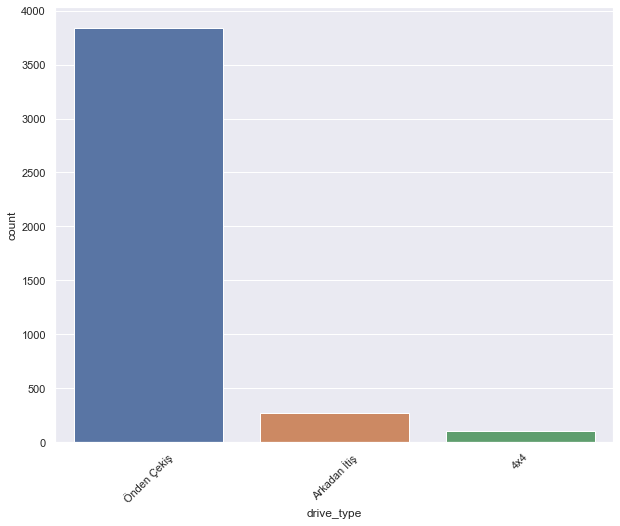

Önden Çekiş     91.278517
Arkadan İtiş     6.368821
4x4              2.352662
Name: drive_type, dtype: float64

In [189]:

sns.set(rc={'figure.figsize':(10,8)})

plt.xticks(rotation=45)

sns.countplot(x = 'drive_type',
              data = df_uni,
              order = df_uni['drive_type'].value_counts().index),
plt.show()
df_uni['drive_type'].value_counts(normalize=True)*100


In [190]:
df_uni

,accelerate,annual_mtv,brand,color,drive_type,engine_capacity,fuel_type,gear_type,horse_power,kilometer,max_power,max_speed,min_power,model,price,safe,series,year
0,11.3,876.0,Alfa Romeo,Beyaz,Önden Çekiş,1598.0,Dizel,Düz,105,143000.0,4000.0,185.0,1750.0,1.6 JTD Distinctive,144750.0,Hatchback/5,Giulietta,2013
1,8.6,594.0,Alfa Romeo,Gri,Önden Çekiş,1970.0,LPG & Benzin,Otomatik,155,245000.0,6400.0,216.0,3500.0,2.0 TS Selespeed,65000.0,Sedan,156,2000
2,11.3,876.0,Alfa Romeo,Beyaz,Önden Çekiş,1598.0,Dizel,Düz,105,145000.0,4000.0,185.0,1750.0,1.6 JTD Distinctive,138000.0,Hatchback/5,Giulietta,2015
3,11.3,876.0,Alfa Romeo,Beyaz,Önden Çekiş,1598.0,Dizel,Düz,105,89758.0,4000.0,185.0,1750.0,1.6 JTD Distinctive,139000.0,Hatchback/5,Giulietta,2012
4,11.3,876.0,Alfa Romeo,Beyaz,Önden Çekiş,1598.0,Dizel,Düz,105,77000.0,4000.0,185.0,1750.0,1.6 JTD Distinctive,159500.0,Hatchback/5,Giulietta,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10760,9.7,1510.0,Mercedes - Benz,Mavi (metalik),Arkadan İtiş,1598.0,Dizel,Otomatik,136,85000.0,3800.0,218.0,2600.0,C 200 d BlueTEC AMG,468000.0,Sedan,C,2016
10762,11.3,1510.0,Mercedes - Benz,Beyaz,Önden Çekiş,1461.0,Dizel,Yarı Otomatik,109,99000.0,4000.0,190.0,2500.0,A 180 CDI BlueEFFICIENCY Style,278000.0,Hatchback/5,A,2017
10764,9.5,876.0,Mercedes - Benz,Mavi (metalik),Arkadan İtiş,1597.0,LPG & Benzin,Otomatik,156,166000.0,5200.0,230.0,4600.0,C 180 Kompressor BlueEFFICIENCY AMG,235000.0,Sedan,C,2011
10765,9.7,876.0,Mercedes - Benz,Beyaz,Arkadan İtiş,1598.0,Dizel,Otomatik,136,175000.0,3800.0,218.0,2600.0,C 200 BlueTEC AMG,439000.0,Sedan,C,2015


In [191]:
df_uni.color.value_counts()

Beyaz              1941
Gri                 614
Siyah               612
Kırmızı             213
Füme                177
Gri (Gümüş)         154
Mavi                140
Bordo                62
Kahverengi           50
Lacivert             50
Gri (metalik)        36
Bej                  36
Mavi (metalik)       32
Şampanya             20
Yeşil                19
Gri (titanyum)       10
Mor                   9
Altın                 8
Turkuaz               7
Turuncu               6
Yeşil (metalik)       6
Sarı                  5
Pembe                 1
Name: color, dtype: int64

In [192]:
df_uni["engine"] = [re.findall("\d+\.\d+",i)for i in df_uni.model]
df_uni["engine"] = [None if len(i)==0 else i[0] for i in df_uni.engine]
df_uni.engine = df_uni["engine"].astype(float)

In [193]:
median = df_uni.engine.median()
def impute_na(dataFrame, variable, mean_median):
    return dataFrame[variable].fillna(mean_median)
#Eksik değerlere medyan değerini atama
X_train['engine'] = impute_na(X_train, 'engine', median)

In [194]:
df_uni.dtypes

accelerate         float64
annual_mtv         float64
brand               object
color               object
drive_type          object
engine_capacity    float64
fuel_type           object
gear_type           object
horse_power          int32
kilometer          float64
max_power          float64
max_speed          float64
min_power          float64
model               object
price              float64
safe                object
series              object
year                object
engine             float64
dtype: object

In [195]:
df_uni.drop(['model','series'], axis=1,inplace=True)


In [367]:
df_uni.year = df_uni.year.astype(int)

In [376]:
df_uni2 = df_uni[df_uni["year"]>2010]

# exploratory data analysis

In [379]:
df_uni2.groupby("brand")["price"].mean().reset_index().sort_values(by='price', ascending=False)[:6].round(2)

,brand,price
17,Porsche,1037243.33
2,BMW,428598.29
12,Mercedes - Benz,390500.00
1,Audi,366758.70
10,MINI,268128.57
24,Volvo,249301.38


In [381]:
df_uni.groupby("brand")["price"].mean().reset_index().sort_values(by='price', ascending=True)[:6].round(2)

,brand,price
10,Lada,28277.50
23,Tofaş,37091.79
3,Chevrolet,94812.74
6,Fiat,103893.81
15,Nissan,107879.76
4,Citroen,113288.03


# Split Train Test Dataset

In [196]:
X =  df_uni.drop(labels=['price'], axis=1)
y =  df_uni.price


X_train, X_test, y_train, y_test = train_test_split(
    df_uni.drop(labels=['price'], axis=1), # predictors
    df_uni.price, # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2945, 16), (1263, 16))


X_train, X_test, y_train, y_test = train_test_split(
    df_uni.drop(labels=['price'], axis=1), # predictors
    df_uni.price, # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

# Rare Labels Encoder

In [197]:
df_uni.color = ["Mavi" if i=="Mavi (metalik)" else i for i in df_uni.color]
df_uni.color = ["Gri" if i=="Gri (Gümüş)"  else i for i in df_uni.color]
df_uni.color = ["Füme" if i=="Gri (metalik)" or i=="Gri (titanyum)"  else i for i in df_uni.color]
df_uni.color = ["Kırmızı" if i=="Bordo"  else i for i in df_uni.color]


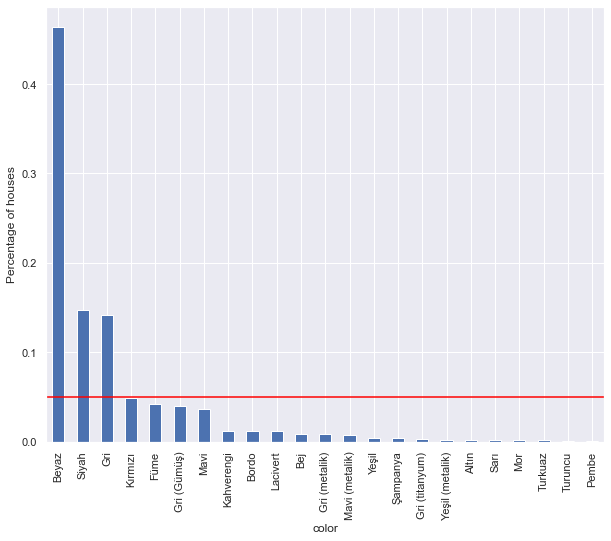

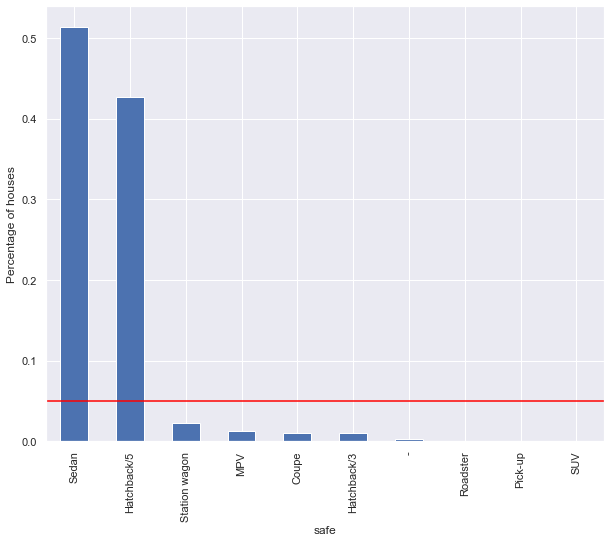

In [198]:
for col in ['color', 'safe']:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [199]:
def rare_encoding(X_train, X_test, variable, tolerance):

    X_train = X_train.copy()
    X_test = X_test.copy()

    # find the most frequent category
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)

    # re-group rare labels
    X_train[variable] = np.where(X_train[variable].isin(
        frequent_cat), X_train[variable], 'Rare')
    
    X_test[variable] = np.where(X_test[variable].isin(
        frequent_cat), X_test[variable], 'Rare')

    return X_train, X_test

In [200]:
def find_non_rare_labels(df_uni, variable, tolerance):
    
    temp = df_uni.groupby([variable])[variable].count() / len(df_uni)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [234]:
for variable in ['color', 'safe','engine']:
    
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

In [235]:
find_non_rare_labels(X_train, 'color', 0.05)

['Beyaz', 'Gri', 'Rare', 'Siyah']

In [236]:
find_non_rare_labels(X_train, 'safe', 0.05)

['Hatchback/5', 'Rare', 'Sedan']

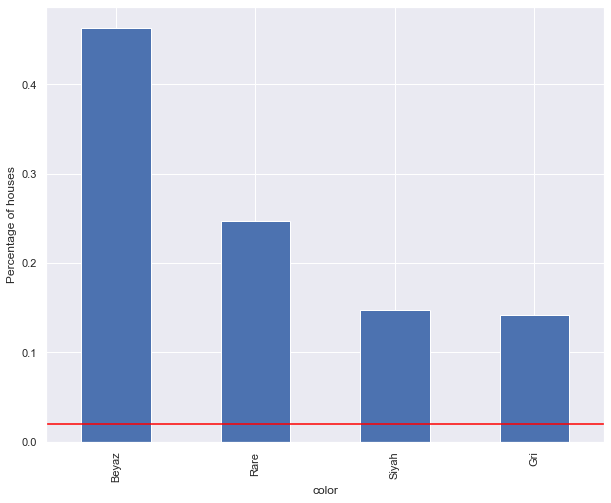

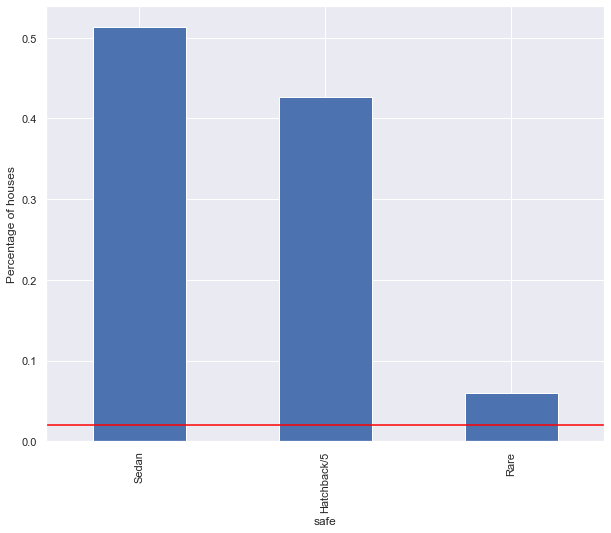

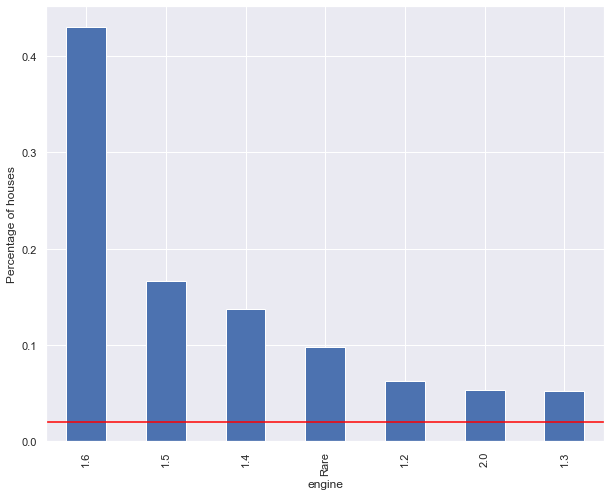

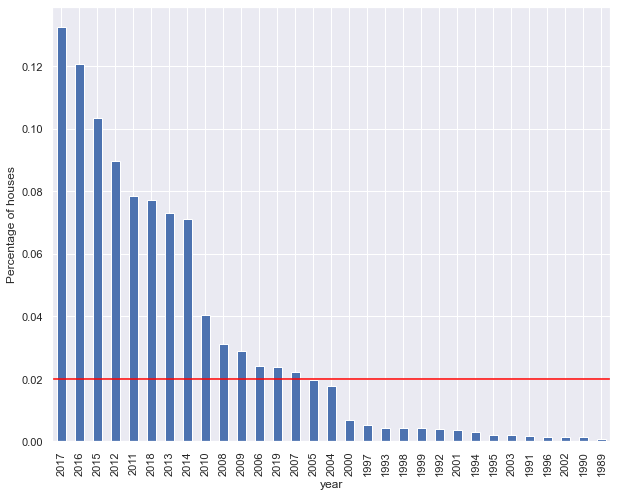

In [252]:
for col in ['color', 'safe','engine','year']:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.02, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [253]:
# Rare value encoder
rare_encoder = RareLabelEncoder(
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=['color', 'safe','engine','year'] # variables to re-group
)  

In [254]:
rare_encoder.fit(X_train.fillna('Missing'))

c:\users\guven bilişim\appdata\local\programs\python\python38\lib\site-packages\feature_engine\encoding\rare_label.py:179: UserWarning:

The number of unique categories for variable color is less than that indicated in n_categories. Thus, all categories will be considered frequent

c:\users\guven bilişim\appdata\local\programs\python\python38\lib\site-packages\feature_engine\encoding\rare_label.py:179: UserWarning:

The number of unique categories for variable safe is less than that indicated in n_categories. Thus, all categories will be considered frequent



RareLabelEncoder(n_categories=4, variables=['color', 'safe', 'engine', 'year'])

In [255]:
rare_encoder.variables_

['color', 'safe', 'engine', 'year']

In [256]:
rare_encoder.encoder_dict_

{'color': array(['Rare', 'Gri', 'Beyaz', 'Siyah'], dtype=object),
 'safe': array(['Sedan', 'Hatchback/5', 'Rare'], dtype=object),
 'engine': Index(['1.6', '1.5', '1.4', 'Rare', '1.2', '2.0', '1.3'], dtype='object'),
 'year': Index(['2017', '2016', '2015', '2012', '2011', '2018', '2013', '2014'], dtype='object')}

In [257]:
X_train = rare_encoder.transform(X_train.fillna('Missing'))
X_test = rare_encoder.transform(X_test.fillna('Missing'))

In [258]:

X_train.shape, X_test.shape

((2945, 16), (1263, 16))

In [259]:
X_train.color.values

array(['Rare', 'Gri', 'Beyaz', ..., 'Beyaz', 'Rare', 'Rare'], dtype=object)

In [261]:
X_train.engine.values

array(['1.5', '1.4', '1.6', ..., '1.5', '1.3', '1.2'], dtype=object)

In [262]:
X_train.year.values

array(['2013', '2011', '2017', ..., '2016', '2012', '2018'], dtype=object)

In [263]:
tmp = pd.get_dummies(X_train['color'])

tmp.head()

,Beyaz,Gri,Rare,Siyah
8047,0,0,1,0
7979,0,1,0,0
9119,1,0,0,0
7523,0,0,0,1
9145,1,0,0,0


In [264]:

pd.concat([X_train['color'],
           pd.get_dummies(X_train['color'])], axis=1).head()

,color,Beyaz,Gri,Rare,Siyah
8047,Rare,0,0,1,0
7979,Gri,0,1,0,0
9119,Beyaz,1,0,0,0
7523,Siyah,0,0,0,1
9145,Beyaz,1,0,0,0


In [265]:
tmp = pd.get_dummies(X_train['brand'])

tmp.head()

,Alfa Romeo,Audi,BMW,Chevrolet,Citroen,Dacia,Fiat,Ford,Honda,Kia,...,Peugeot,Porsche,Renault,Seat,Skoda,Suzuki,Tofaş,Toyota,Volkswagen,Volvo
8047,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7979,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7523,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [266]:
pd.concat([X_train['brand'],
           pd.get_dummies(X_train['brand'])], axis=1).head()

,brand,Alfa Romeo,Audi,BMW,Chevrolet,Citroen,Dacia,Fiat,Ford,Honda,...,Peugeot,Porsche,Renault,Seat,Skoda,Suzuki,Tofaş,Toyota,Volkswagen,Volvo
8047,Renault,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7979,Renault,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9119,Skoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7523,Peugeot,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9145,Skoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [267]:

tmp = pd.get_dummies(X_train['drive_type'])

tmp.head()

,4x4,Arkadan İtiş,Önden Çekiş
8047,0,0,1
7979,0,0,1
9119,0,0,1
7523,0,0,1
9145,0,0,1


In [268]:

tmp = pd.get_dummies(X_train['fuel_type'])

tmp.head()

,Benzin,Dizel,LPG & Benzin
8047,0,1,0
7979,1,0,0
9119,0,1,0
7523,1,0,0
9145,0,1,0


In [269]:

tmp = pd.get_dummies(X_train['safe'])

tmp.head()

,Hatchback/5,Rare,Sedan
8047,0,0,1
7979,0,0,1
9119,1,0,0
7523,1,0,0
9145,1,0,0


In [300]:
tmp_train = pd.get_dummies(X_train)

print(tmp.shape)

tmp.head()

(1263, 61)


,accelerate,annual_mtv,engine_capacity,horse_power,kilometer,max_power,max_speed,min_power,brand_Alfa Romeo,brand_Audi,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_Rare,engine_Rare
9207,11.0,1510.0,1598.0,120,138000.0,3500.0,206.0,1500.0,0,0,...,0,0,0,0,0,1,0,0,0,1
5279,12.9,806.0,1248.0,84,178675.0,6000.0,170.0,4000.0,0,0,...,0,0,0,0,0,0,1,0,0,1
7348,13.1,876.0,1560.0,114,280000.0,3600.0,197.0,1750.0,0,0,...,1,0,0,0,0,0,0,0,0,1
345,7.8,2536.0,1968.0,177,132000.0,4200.0,228.0,1750.0,0,1,...,0,0,0,0,1,0,0,0,0,1
8003,13.0,1510.0,1461.0,90,175000.0,4000.0,180.0,1750.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [298]:
tmp_test = pd.get_dummies(X_test)

print(tmp.shape)

tmp.head()

(1263, 61)


,accelerate,annual_mtv,engine_capacity,horse_power,kilometer,max_power,max_speed,min_power,brand_Alfa Romeo,brand_Audi,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_Rare,engine_Rare
9207,11.0,1510.0,1598.0,120,138000.0,3500.0,206.0,1500.0,0,0,...,0,0,0,0,0,1,0,0,0,1
5279,12.9,806.0,1248.0,84,178675.0,6000.0,170.0,4000.0,0,0,...,0,0,0,0,0,0,1,0,0,1
7348,13.1,876.0,1560.0,114,280000.0,3600.0,197.0,1750.0,0,0,...,1,0,0,0,0,0,0,0,0,1
345,7.8,2536.0,1968.0,177,132000.0,4200.0,228.0,1750.0,0,1,...,0,0,0,0,1,0,0,0,0,1
8003,13.0,1510.0,1461.0,90,175000.0,4000.0,180.0,1750.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [271]:
df_uni.engine.value_counts()

1.60    1832
1.50     677
1.40     579
1.20     258
1.30     223
2.00     216
1.00      34
1.33      15
0.90      14
1.25      13
1.80      12
3.00      12
1.90       6
1.10       4
0.80       2
2.30       1
2.80       1
2.40       1
3.20       1
Name: engine, dtype: int64

In [272]:
#X_train["engine"]= [i for i in X_train1.engine]

In [276]:
#tmp.drop(['engine_1.1','engine_1.2','engine_1.1','engine_1.3','engine_1.4','engine_1.5','engine_1.6'], axis=1,inplace=True)

In [275]:
#tmp.drop(['engine_1.0','engine_1.25','engine_1.33','engine_1.8','engine_1.9','engine_2.0'], axis=1,inplace=True)

In [233]:
tmp

,accelerate,annual_mtv,engine_capacity,horse_power,kilometer,max_power,max_speed,min_power,brand_Alfa Romeo,brand_Audi,...,year_2016,year_2017,year_2018,year_2019,engine_0.8,engine_0.9,engine_2.8,engine_3.0,engine_3.2,engine_Missing
8047,11.5,876.0,1461.0,110,130000.0,4000.0,185.0,2000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7979,12.5,876.0,1390.0,75,69000.0,5500.0,170.0,4250.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9119,10.2,1510.0,1598.0,115,63814.0,3250.0,202.0,1500.0,0,0,...,0,1,0,0,0,0,0,0,0,0
7523,14.0,341.0,998.0,69,130000.0,6000.0,157.0,3600.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9145,10.9,1510.0,1598.0,110,98000.0,3250.0,195.0,1500.0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,12.4,1510.0,1560.0,93,95000.0,4000.0,180.0,1750.0,0,0,...,1,0,0,0,0,0,0,0,0,0
8967,12.9,617.0,1422.0,80,380000.0,4000.0,176.0,2200.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4258,10.9,1510.0,1499.0,120,189000.0,3600.0,193.0,1750.0,0,0,...,1,0,0,0,0,0,0,0,0,0
7208,14.5,450.0,1248.0,95,153000.0,4000.0,175.0,1750.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(X_train['brand'])

In [ ]:
pd.get_dummies(X_train['color'])

In [ ]:
pd.get_dummies(X_train['fuel_type'])

In [ ]:
pd.get_dummies(X_train['gear_type'])

In [ ]:
pd.get_dummies(X_train['brand'])


In [116]:
ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    variables=['brand', 'color','drive_type','fuel_type','gear_type','safe'],  # we can select which variables to encode
    drop_last=True)  # to return k-1, false to return k


ohe_enc.fit(X_train.fillna('Missing'))

OneHotEncoder(drop_last=True,
              variables=['brand', 'color', 'drive_type', 'fuel_type',
                         'gear_type', 'safe'])

In [296]:
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

In [297]:
tmp_train = ohe_enc.transform(X_train.fillna('Missing'))


NameError: name 'ohe_enc' is not defined

In [130]:
tmp_test = ohe_enc.transform(X_test.fillna('Missing'))

tmp.head()

,accelerate,annual_mtv,engine_capacity,horse_power,kilometer,max_power,max_speed,min_power,year,brand_Renault,...,color_Kırmızı,color_Füme,drive_type_Önden Çekiş,drive_type_4x4,fuel_type_Dizel,fuel_type_Benzin,gear_type_Yarı Otomatik,gear_type_Düz,safe_Sedan,safe_Hatchback/5
9207,11.0,1510.0,1598.0,120,138000.0,3500.0,206.0,1500.0,2016,0,...,0,0,1,0,1,0,1,0,0,1
5279,12.9,806.0,1248.0,84,178675.0,6000.0,170.0,4000.0,2017,0,...,1,0,1,0,0,1,0,1,0,1
7348,13.1,876.0,1560.0,114,280000.0,3600.0,197.0,1750.0,2011,0,...,0,0,1,0,1,0,1,0,1,0
345,7.8,2536.0,1968.0,177,132000.0,4200.0,228.0,1750.0,2015,0,...,0,0,0,1,1,0,1,0,1,0
8003,13.0,1510.0,1461.0,90,175000.0,4000.0,180.0,1750.0,2016,1,...,0,0,1,0,1,0,0,1,1,0


In [294]:
tmp_test.drop(['model','series'], axis=1,inplace=True)

NameError: name 'tmp_test' is not defined

In [295]:
tmp_test

NameError: name 'tmp_test' is not defined

In [137]:
tmp_train.drop(['model','series'], axis=1,inplace=True)
tmp_train

,accelerate,annual_mtv,engine_capacity,horse_power,kilometer,max_power,max_speed,min_power,year,brand_Renault,...,color_Kırmızı,color_Füme,drive_type_Önden Çekiş,drive_type_4x4,fuel_type_Dizel,fuel_type_Benzin,gear_type_Yarı Otomatik,gear_type_Düz,safe_Sedan,safe_Hatchback/5
8047,11.5,876.0,1461.0,110,130000.0,4000.0,185.0,2000.0,2013,1,...,0,0,1,0,1,0,1,0,1,0
7979,12.5,876.0,1390.0,75,69000.0,5500.0,170.0,4250.0,2011,1,...,0,0,1,0,0,1,0,1,1,0
9119,10.2,1510.0,1598.0,115,63814.0,3250.0,202.0,1500.0,2017,0,...,0,0,1,0,1,0,1,0,0,1
7523,14.0,341.0,998.0,69,130000.0,6000.0,157.0,3600.0,2010,0,...,0,0,1,0,0,1,1,0,0,1
9145,10.9,1510.0,1598.0,110,98000.0,3250.0,195.0,1500.0,2016,0,...,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,12.4,1510.0,1560.0,93,95000.0,4000.0,180.0,1750.0,2016,0,...,0,0,1,0,1,0,0,1,0,1
8967,12.9,617.0,1422.0,80,380000.0,4000.0,176.0,2200.0,2007,0,...,0,0,1,0,1,0,0,1,0,1
4258,10.9,1510.0,1499.0,120,189000.0,3600.0,193.0,1750.0,2016,0,...,0,0,1,0,1,0,1,0,1,0
7208,14.5,450.0,1248.0,95,153000.0,4000.0,175.0,1750.0,2012,0,...,0,0,1,0,1,0,0,1,0,1


In [139]:
X_train

,accelerate,annual_mtv,brand,color,drive_type,engine_capacity,fuel_type,gear_type,horse_power,kilometer,max_power,max_speed,min_power,safe,year,engine
8047,11.5,876.0,Renault,Gri,Önden Çekiş,1461.0,Dizel,Yarı Otomatik,110,130000.0,4000.0,185.0,2000.0,Sedan,2013,1.5
7979,12.5,876.0,Renault,Gri,Önden Çekiş,1390.0,Benzin,Düz,75,69000.0,5500.0,170.0,4250.0,Sedan,2011,1.4
9119,10.2,1510.0,Skoda,Beyaz,Önden Çekiş,1598.0,Dizel,Yarı Otomatik,115,63814.0,3250.0,202.0,1500.0,Hatchback/5,2017,1.6
7523,14.0,341.0,Peugeot,Siyah,Önden Çekiş,998.0,Benzin,Yarı Otomatik,69,130000.0,6000.0,157.0,3600.0,Hatchback/5,2010,1.0
9145,10.9,1510.0,Skoda,Beyaz,Önden Çekiş,1598.0,Dizel,Yarı Otomatik,110,98000.0,3250.0,195.0,1500.0,Hatchback/5,2016,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,12.4,1510.0,Citroen,Gri,Önden Çekiş,1560.0,Dizel,Düz,93,95000.0,4000.0,180.0,1750.0,Hatchback/5,2016,1.6
8967,12.9,617.0,Seat,Gri,Önden Çekiş,1422.0,Dizel,Düz,80,380000.0,4000.0,176.0,2200.0,Hatchback/5,2007,1.4
4258,10.9,1510.0,Ford,Beyaz,Önden Çekiş,1499.0,Dizel,Yarı Otomatik,120,189000.0,3600.0,193.0,1750.0,Sedan,2016,1.5
7208,14.5,450.0,Opel,Mavi,Önden Çekiş,1248.0,Dizel,Düz,95,153000.0,4000.0,175.0,1750.0,Hatchback/5,2012,1.3


In [284]:
df_uni.corr()

,accelerate,annual_mtv,engine_capacity,horse_power,kilometer,max_power,max_speed,min_power,price,engine
accelerate,1.000000,-0.563047,-0.605772,-0.826212,0.081940,0.059557,-0.884487,0.138835,-0.620900,-0.561372
annual_mtv,-0.563047,1.000000,0.641567,0.695014,-0.237271,-0.279688,0.631761,-0.314306,0.795634,0.632878
engine_capacity,-0.605772,0.641567,1.000000,0.779823,0.186395,-0.104076,0.717744,-0.083723,0.529490,0.994390
horse_power,-0.826212,0.695014,0.779823,1.000000,-0.007033,0.017860,0.920167,-0.052584,0.739383,0.717362
kilometer,0.081940,-0.237271,0.186395,-0.007033,1.000000,0.047802,-0.037970,0.138082,-0.303938,0.164727
max_power,0.059557,-0.279688,-0.104076,0.017860,0.047802,1.000000,-0.092319,0.816901,-0.212616,-0.185338
max_speed,-0.884487,0.631761,0.717744,0.920167,-0.037970,-0.092319,1.000000,-0.156504,0.733401,0.675731
min_power,0.138835,-0.314306,-0.083723,-0.052584,0.138082,0.816901,-0.156504,1.000000,-0.299697,-0.141190
price,-0.620900,0.795634,0.529490,0.739383,-0.303938,-0.212616,0.733401,-0.299697,1.000000,0.488948
engine,-0.561372,0.632878,0.994390,0.717362,0.164727,-0.185338,0.675731,-0.141190,0.488948,1.000000


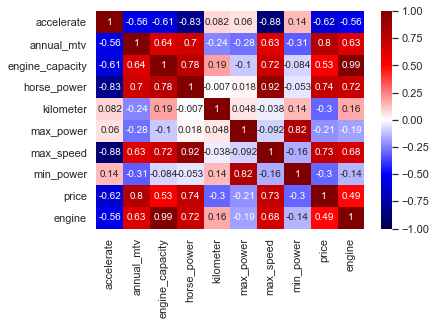

In [286]:
sns.heatmap(df_uni.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


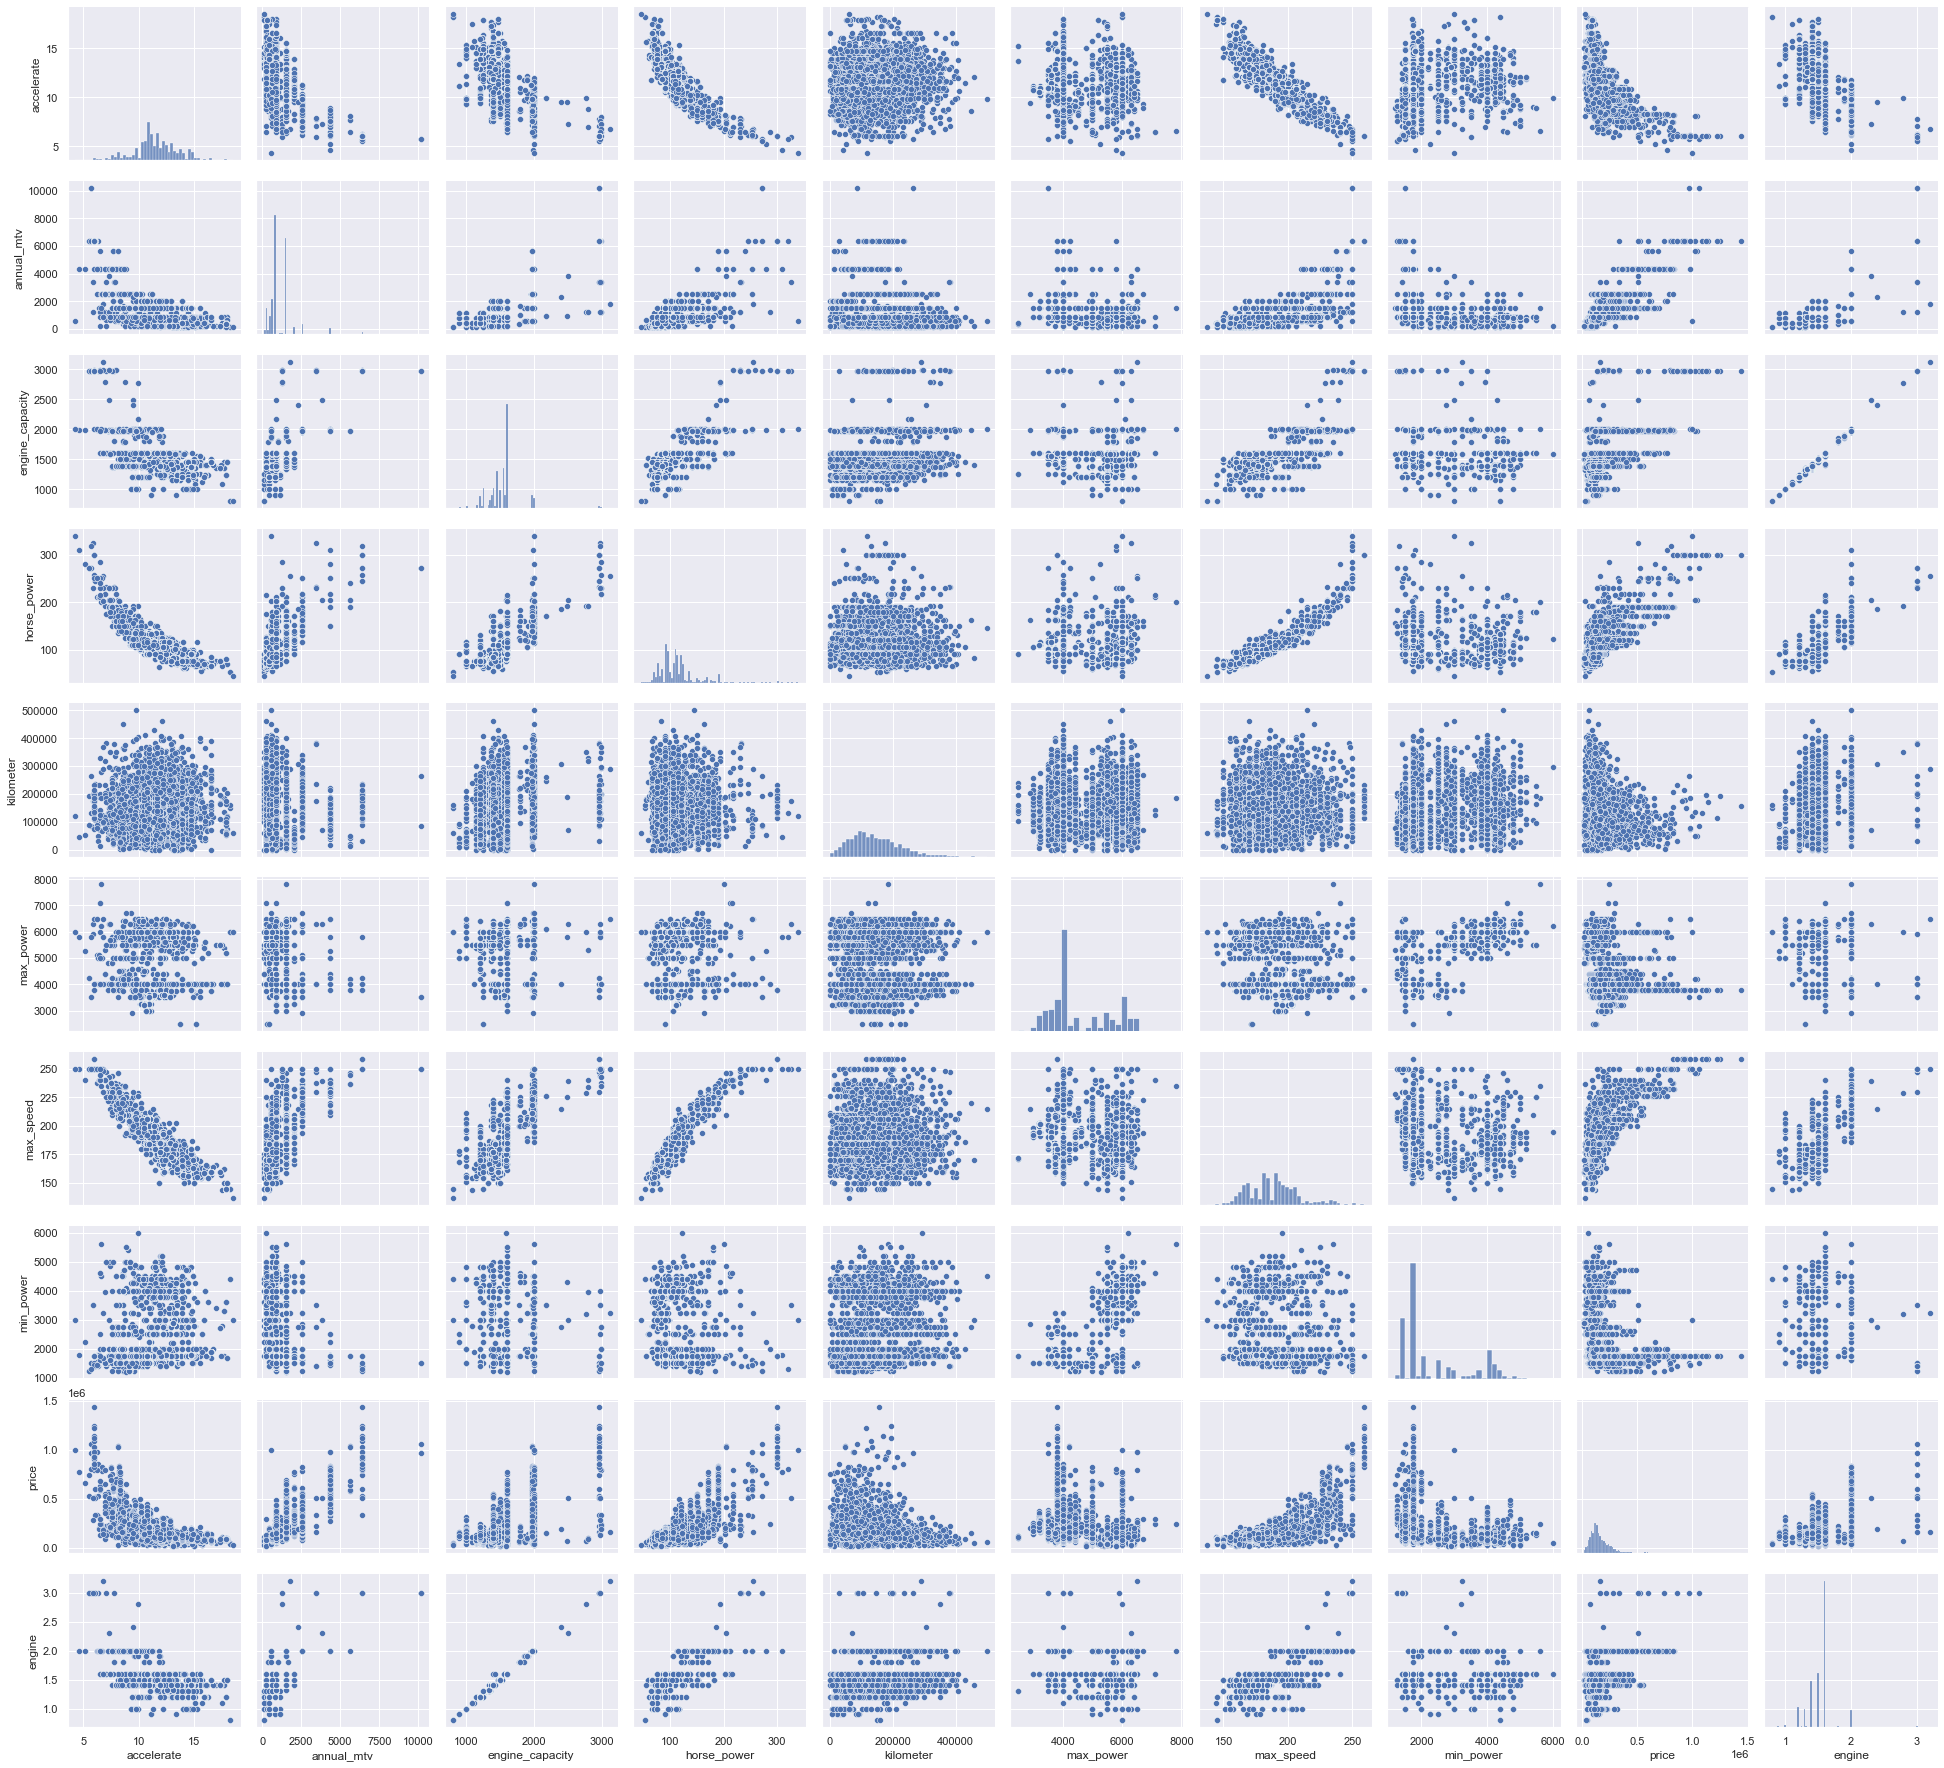

In [289]:
sns.pairplot(df_uni, aspect=1.1);

In [283]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [350]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('price ~ accelerate + annual_mtv + kilometer + max_power +horse_power +engine + max_speed +engine_capacity +color + brand +min_power+year', data=df_uni, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     285.8
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:51:41   Log-Likelihood:                -46537.
No. Observations:                3901   AIC:                         9.323e+04
Df Residuals:                    3821   BIC:                         9.373e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.534e+05   3.03e+04     -5.055      0.000   -2.13e+05   -9.39e+04
color[T.Bej]              -695.6374   1.48e+04     -0.047      0.963   -2.97e+04    2.83e+04
color[T.Beyaz]           -1.454e+04   1.33e+04     -1.095      0.274   -4.06e+04    1.15e+04
color[T.Füme]            -4666.6187   1.35e+04     -0.346      0.730   -3.11e+04    2.18e+04
color[T.Gri]             -3050.4291   1.33e+04     -0.229      0.819   -2.92e+04    2.31e+04
color[T.Kahverengi]      -7248.0320   1.44e+04     -0.503      0.615   -3.55e+04     2.1e+04
color[T.Kırmızı]         -7319.6724   1.34e+04     -0.545      0.586   -3.37e+04     1.9e+04
color[T.Lacivert]        -1.074e+04   1.46e+04     -0.736      0.461   -3.93e+04    1.78e+04
color[T.Mavi]            -2854.2989   1.35e+04     -0.211      0.833   -2.94e+04    2.37e+04
color[T.Mor]             -1.144e+04   1.94e+04     -0.590      0.555   -4.94e+04    2.66e+04
color[T.Pembe]           -1.139e+04   4.18e+04     -0.273      0.785   -9.33e+04    7.05e+04
color[T.Sarı]             1.203e+04   2.13e+04      0.564      0.573   -2.98e+04    5.39e+04
color[T.Siyah]           -7136.8452   1.33e+04     -0.535      0.593   -3.33e+04     1.9e+04
color[T.Turkuaz]         -1362.8630    2.3e+04     -0.059      0.953   -4.65e+04    4.37e+04
color[T.Turuncu]          7140.6774    2.3e+04      0.310      0.756    -3.8e+04    5.22e+04
color[T.Yeşil]           -2.015e+04   1.58e+04     -1.272      0.204   -5.12e+04    1.09e+04
color[T.Yeşil (metalik)] -1.132e+04   2.29e+04     -0.495      0.620   -5.61e+04    3.35e+04
color[T.Şampanya]        -1.408e+04   1.59e+04     -0.885      0.376   -4.53e+04    1.71e+04
brand[T.Audi]             7.982e+04   5489.564     14.540      0.000    6.91e+04    9.06e+04
brand[T.BMW]              1.456e+05   2.74e+04      5.319      0.000    9.19e+04    1.99e+05
brand[T.Chevrolet]       -1.762e+04   5577.592     -3.160      0.002   -2.86e+04   -6687.465
brand[T.Citroen]         -1.945e+04   5418.570     -3.590      0.000   -3.01e+04   -8829.379
brand[T.Dacia]           -1.892e+04   5863.661     -3.226      0.001   -3.04e+04   -7418.960
brand[T.Fiat]            -2.247e+04   5554.800     -4.045      0.000   -3.34e+04   -1.16e+04
brand[T.Ford]             -350.3492   5187.655     -0.068      0.946   -1.05e+04    9820.489
brand[T.Honda]             2.25e+04   5815.575      3.869      0.000    1.11e+04    3.39e+04
brand[T.Kia]             -1.796e+04   5723.323     -3.138      0.002   -2.92e+04   -6738.629
brand[T.Lada]             -2.58e+04   1.21e+04     -2.135      0.033   -4.95e+04   -2107.941
brand[T.MINI]             6.638e+04   8149.176      8.145      0.000    5.04e+04    8.24e+04
brand[T.Mazda]            8960.7901   8702.469      1.030      0.303   -8101.141     2.6e+04
brand[T.Merced

In [337]:
X =  tmp_train
y =  y_train

lr = LinearRegression()
fit = lr.fit(X,y) # for later use

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [302]:
tmp_train.shape

(2945, 61)

In [315]:
np.all(np.isfinite(y_train))


True

In [316]:
y_train.isnull().sum()

0

In [320]:
np.isnan(y_train.any()) #and gets False


False

In [319]:
np.isfinite(y_train.all())

True

In [323]:
y_train.dropna()

8047    141900.0
7979     99000.0
9119    218500.0
7523     84500.0
9145    217500.0
          ...   
3297    139000.0
8967     67000.0
4258    159500.0
7208    134750.0
7450    156000.0
Name: price, Length: 2945, dtype: float64

In [324]:
y_train.shape

(2945,)

In [327]:
tmp_train

,accelerate,annual_mtv,engine_capacity,horse_power,kilometer,max_power,max_speed,min_power,engine,brand_Alfa Romeo,...,safe_Sedan,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_Rare
8047,11.5,876.0,1461.0,110,130000.0,4000.0,185.0,2000.0,1.5,0,...,1,0,0,1,0,0,0,0,0,0
7979,12.5,876.0,1390.0,75,69000.0,5500.0,170.0,4250.0,1.4,0,...,1,1,0,0,0,0,0,0,0,0
9119,10.2,1510.0,1598.0,115,63814.0,3250.0,202.0,1500.0,1.6,0,...,0,0,0,0,0,0,0,1,0,0
7523,14.0,341.0,998.0,69,130000.0,6000.0,157.0,3600.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
9145,10.9,1510.0,1598.0,110,98000.0,3250.0,195.0,1500.0,1.6,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,12.4,1510.0,1560.0,93,95000.0,4000.0,180.0,1750.0,1.6,0,...,0,0,0,0,0,0,1,0,0,0
8967,12.9,617.0,1422.0,80,380000.0,4000.0,176.0,2200.0,1.4,0,...,0,0,0,0,0,0,0,0,0,1
4258,10.9,1510.0,1499.0,120,189000.0,3600.0,193.0,1750.0,1.5,0,...,1,0,0,0,0,0,1,0,0,0
7208,14.5,450.0,1248.0,95,153000.0,4000.0,175.0,1750.0,1.3,0,...,0,0,1,0,0,0,0,0,0,0
